In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/adenian/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

print(df_skills_count)

      job_skills            job_title_short  skill_count
1480      python             Data Scientist       113711
1822         sql              Data Engineer       113130
1479      python              Data Engineer       108022
1821         sql               Data Analyst        92428
1823         sql             Data Scientist        78982
...          ...                        ...          ...
2173       webex      Senior Data Scientist            1
1054  mattermost             Data Scientist            1
270      clickup  Machine Learning Engineer            1
797       heroku        Senior Data Analyst            1
1128    msaccess               Data Analyst            1

[2256 rows x 3 columns]


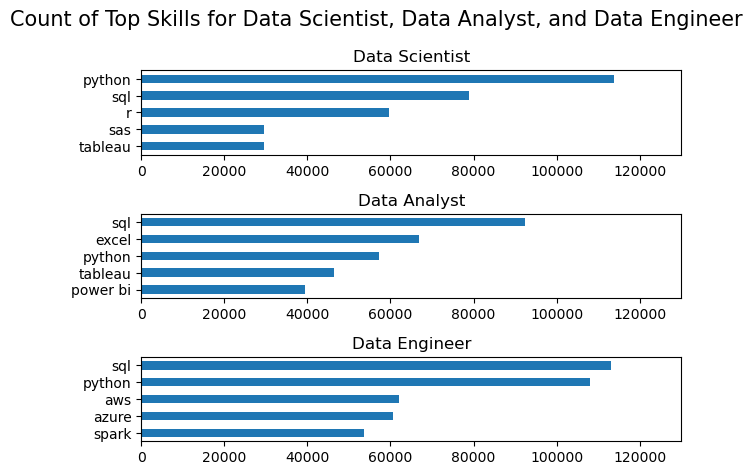

In [3]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 130000)


fig.suptitle('Count of Top Skills for Data Scientist, Data Analyst, and Data Engineer', fontsize=15)
fig.tight_layout()